In [1]:
import numpy as np
import pyvista as pv

from scipy.spatial import Voronoi, ConvexHull

import pyvoro


In [45]:
# points = np.load('early_poss.npy')


# ps = np.load('ps_early.npy')



0
0
1
2
3
4
5


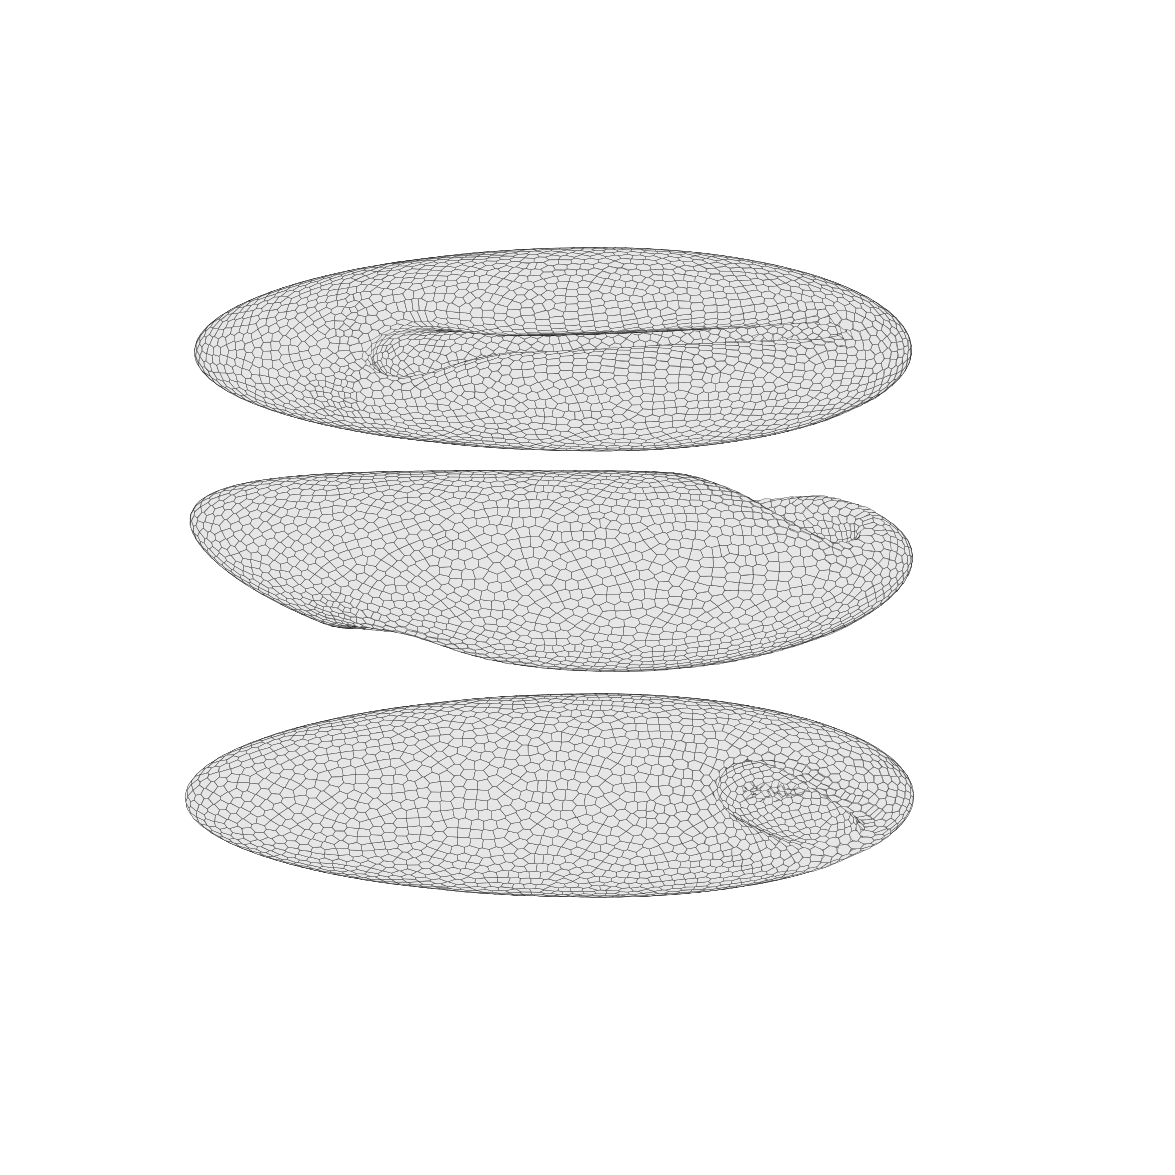

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

rng = np.random.default_rng(11)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

def make_plot(points, ps, ax):

    all_three = True

    originals = []
    sorted = np.argsort(points[:, 1])


    points = points[sorted]
    ps = ps[sorted]

    extra = np.concatenate([points, points + 1.*ps, points - 1.*ps])

    voronoi = pyvoro.compute_voronoi(
    extra, # point positions
    [[-100., 100.0], [-100.0, 100.0], [-100.0, 100.0]], # limits
    2.0, # block size

    )

    # for each Voronoi cell, plot all the faces of the corresponding polygon
    for vnoicell, p in zip(voronoi[:5000], ps):
        faces = []
        # the vertices are the corner points of the Voronoi cell
        vertices = np.array(vnoicell['vertices'])
        # cycle through all faces of the polygon
        for face in vnoicell['faces']:
            faces.append(vertices[np.array(face['vertices'])])
        
        
        # # join the faces into a 3D polygon
        # polygon = Poly3DCollection(faces, alpha=1., 
        #                            facecolors="white",
        #                            linewidths=0.1,edgecolors='black')
        # ax.add_collection3d(polygon)

        dots = []
        for face in faces:
            # check the normal of the face
            normal = np.cross(face[1] - face[0], face[2] - face[0])
            normal = normal / np.linalg.norm(normal)
            
            dot = np.dot(normal, p)

            dots.append(dot)

        best = np.argmax(dots)
        face = faces[best]

        originals.append(face)


        polygon = Poly3DCollection([face], alpha=1., 
                                facecolors=(0.9,0.9,0.9),
                                linewidths=0.2,edgecolors='black')
        ax.add_collection3d(polygon)

        if not all_three:
            continue

        rot1 = np.vstack([face[:,0], face[:,2], face[:,1]]).T
        offset1 = np.array([0,0,50])
        rot2 = np.vstack([face[:,0], -face[:,2], face[:,1]]).T
        offset2 = np.array([0,0,-50])

        polygon = Poly3DCollection([rot1 + offset1], alpha=1.,
                                facecolors=(0.9,0.9,0.9),
                                linewidths=0.2,edgecolors='black')
        ax.add_collection3d(polygon)
        
        
        polygon = Poly3DCollection([rot2+ offset2], alpha=1.,
                            facecolors=(0.9,0.9,0.9),
                            linewidths=0.2,edgecolors='black')
        ax.add_collection3d(polygon)
        


# make_plot(points, ps, ax)

ax.set_xlim(-60,60)
ax.set_ylim(-60,60)
ax.set_zlim(-60,60)


# remove the axes
ax._axis3don = False

# set the viewing angle
ax.view_init(elev=0, azim=-90)


all_points = np.load('simple_poss.npy')
all_ps = np.load('simple_ps.npy')



# make animation
from matplotlib.animation import FuncAnimation

def update(i):
    print(i)
    ax.clear()
    points = all_points[i]
    ps = all_ps[i]

    make_plot(points, ps, ax)
    
    ax.set_xlim(-60,60)
    ax.set_ylim(-60,60)
    ax.set_zlim(-60,60)

    ax._axis3don = False
    ax.view_init(elev=0, azim=-90)


    return ax

ani = FuncAnimation(fig, update, frames=range(len(all_points)), repeat=False)

ani.save('simple_voronoi.mp4', writer='ffmpeg', fps=2)

plt.show()

# mercador projection

from wikipedia:

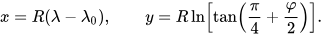

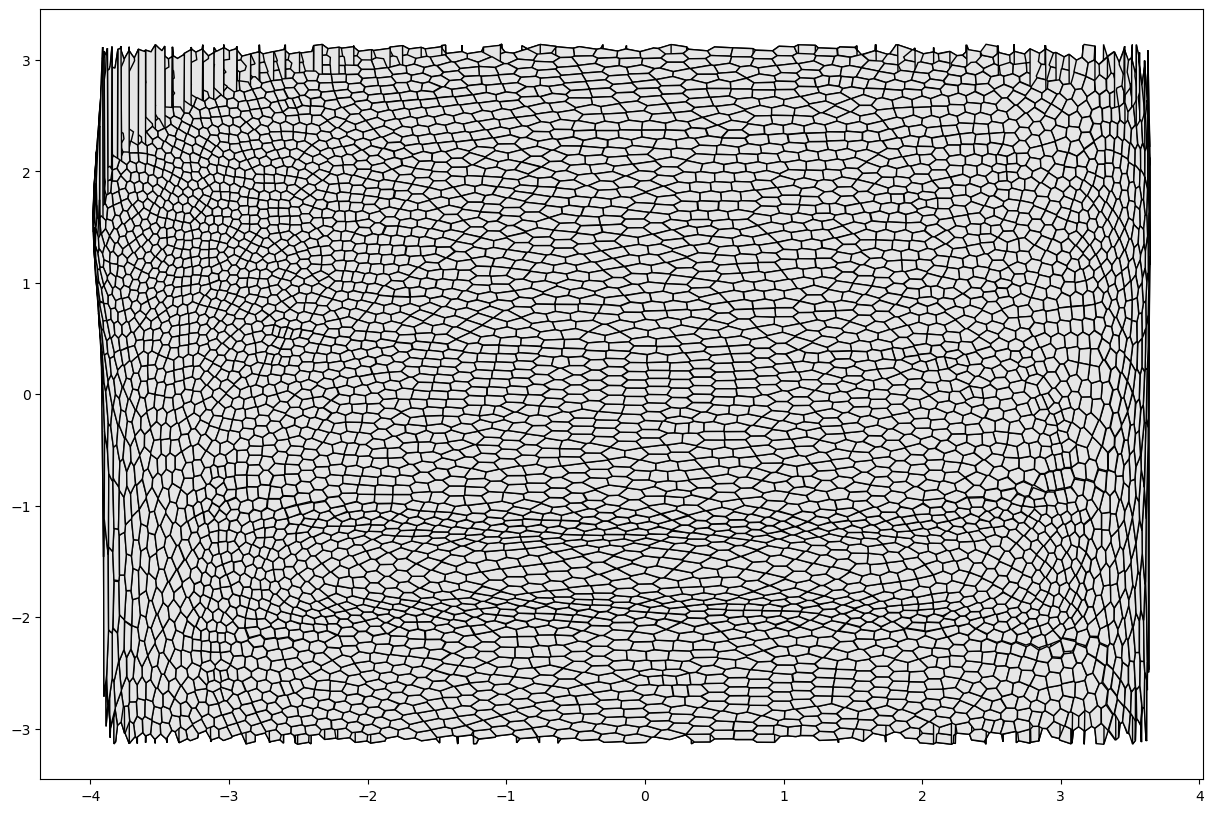

In [44]:
def mercator(long, lat):
    x = long
    y = np.log(np.tan(lat) + 1.0/np.cos(lat))
    return x, y


plt.figure(figsize=(15,10))

minmaxx = (-70, 70) 
for face in originals:
    longd = np.arctan2(face[:,2], face[:,1])
    latd = np.arcsin(face[:,0]/(np.linalg.norm(face, axis=1) + 10.))

    x, y = mercator(longd, latd)

    # draw the face as a polygon
    # c = (face[0,0]-minmaxx[0])/(2.*minmaxx[1])
    c = 0.9
    plt.fill(y*3, x, color=(c,c,c), alpha=1, edgecolor='black')

plt.show()

In [46]:
points = np.load('early_poss.npy')

tri = Voronoi(points)

# get neighbors
indptr, indices = tri.vertex_neighbor_vertices

nbs = []
# get neighbors for each point
for i in range(len(points)):
    nbs.append(indices[indptr[i]:indptr[i+1]])


new_points = []

seen_points = []

original_index = []

for i in range(len(points)):
    print(i/len(points), end='\r')
    new_points.append(points[i])
    random_color = np.random.rand(3)
    original_index.append(i) 
    for j in nbs[i]:
        if set([i, j]) in seen_points:
            continue
        new_points.append((points[i] + points[j]) / 2)
        seen_points.append(set([i, j]))
        original_index.append(i)

new_points = np.array(new_points)


In [15]:
# new_points


array([[ 22.953701  ,   0.24650294, -16.557964  ],
       [ 21.586704  ,  -0.11349684,   2.6884604 ],
       [ 21.893291  ,   1.7138588 ,   2.5508213 ],
       ...,
       [ -5.0137353 ,  22.032719  ,  -7.3438745 ],
       [ -6.032687  , -13.591119  ,  18.944372  ],
       [-32.05221   ,  20.289392  ,  -1.8309369 ]], dtype=float32)

In [27]:
newdel = Delaunay(new_points)

simplex = newdel.find_simplex(new_points[1])

In [23]:
indptr, indices = newdel.vertex_neighbor_vertices


pd_style = []

for k in range(new_points.shape[0]):
    nbs = indices[indptr[k]:indptr[k+1]]
    pd_style.append(len(nbs))
    for nb in nbs:
        new_points(nb)

38658

In [82]:
points = np.load('early_poss.npy')

cloud = pv.PolyData(points)
surf = cloud.delaunay_3d(alpha = 9999.)



# show the points
pl = pv.Plotter()
cloud2 = pv.PolyData(new_points)

pl.add_mesh(cloud2, point_size=5, color='green')
pl.add_mesh(cloud, point_size=5, color='red')
pl.add_mesh(surf,  show_edges=True,)
pl.show()


Widget(value='<iframe src="http://localhost:51087/index.html?ui=P_0x1f8eb201580_11&reconnect=auto" class="pyvi…

In [38]:
cloud = pv.PolyData(new_points)
surf = cloud.delaunay_3d(alpha = 9999.)


In [44]:
from numba import njit


@njit(parallel=True)
def do_da_thing(offsets, cells, surf_points,  points):
    currenti = 0

    scalar = []

    good_cells = []
    n_good = 0
    for offset in offsets:
        # print(currenti/len(offsets), n_good, end='\r')

        n_tri = cells[offset]
        tri = cells[(offset+1):(offset+n_tri+1)]

        has_broken = False
        for point in tri:
            sp = surf_points[point]
            for p in points:
                if np.allclose(sp, p):
                    scalar.append(p)
                    has_broken = True
                    break
            if has_broken:
                break

        if has_broken:
            good_cells.append(n_tri)
            for t in tri:
                good_cells.append(t)
            n_good += 1

        currenti += 1

good_cells = do_da_thing(surf.offset, surf.cells, surf.points, new_points)

c:\Users\jakob\miniconda3\envs\reworked\lib\site-packages\numba\core\typed_passes.py:336: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\AppData\Local\Temp\ipykernel_140\2462652661.py", line 4:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaPerformanceWarning(msg,

KeyboardInterrupt



In [69]:
surf.cells = np.array(good_cells)

array([   3,   35,   25, 2373,    3], dtype=int64)

In [62]:
points[closest]


array([ 25.296047 ,  17.125185 , -10.3861265], dtype=float32)

Not exactly looking perfect :(

![alt text](viz_screenshot.png)